<a href="https://colab.research.google.com/github/xbadiam/Portfolio/blob/main/Forecasting/Bike_Sharing/GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Contexto

Los sistemas de bicicletas compartidas, también conocidos como sistemas de bicicletas públicas, facilitan la disponibilidad automática de bicicletas para que sean utilizadas temporalmente como medio de transporte. La mayoría de estos sistemas permiten recoger una bicicleta y devolverla en un punto diferente (estaciones o dockers), para que el usuario solo necesite tener la bicicleta en su posesión durante el desplazamiento. Uno de los principales retos en la gestión de estos sistemas es la necesidad de redistribuir las bicicletas para intentar que, en todas las estaciones, haya bicicletas disponibles a la vez que espacios libres para devoluciones.

A diferencia de otros servicios de transporte como el autobús o el metro, la duración del viaje y la posición de salida y llegada se registran explícitamente en estos sistemas. Esta característica convierte al sistema de bicicletas compartidas en una red virtual de sensores que puede utilizarse para medir la movilidad en la ciudad. Por lo tanto, se espera que la mayoría de los eventos importantes en la ciudad puedan detectarse mediante el monitoreo de estos datos.

Con el objetivo de mejorar la planificación y ejecución de la distribución de las bicicletas, se plantea crear un modelo capaz de predecir el número de usuarios para las siguientes 36 horas. De esta forma, a las 12h de cada día, la compañía encargada de gestionar las estaciones de alquiler podrá conocer la demanda prevista el resto del día (12 horas) y el siguiente día (24 horas).

### 1.2. Descripción de los datosEnendiendo los datos

* **instant**: Índice de registros
* **dteday**: Fecha
* **season**: Estación del año (1:springer, 2:summer, 3:fall, 4:winter)
* **yr**: Año (0: 2011, 1:2012)
* **mnth**: mes (1 a 12)
* **hr** houras del día (0 to 23)
* **holiday**: Indica si el día del tiempo es festivo o no.
* **weekday**: día de la semana
* **workingday**: Si el día no es fin de semana ni festivo es 1, en caso contrario es 0.
* **weathersit**:
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +   Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* **temp**: Temperatura normalizada en grados Celsius. Los valores se dividen a 41(max)
* **atemp**: Sensación temperatura normalizada en grados Celsius. Los valores se dividen en 50 (max)
	* hum: Normalized humidity. The values are divided to 100 (max)
	* windspeed: Normalized wind speed. The values are divided to 67 (max)
	* casual: count of casual users
	* registered: count of registered users
	* cnt: count of total rental bikes including both casual and registered
* **casual**: Recuento de usuarios ocasionales
* **registered**: Recuento de los usuarios registrados.
* **cnt**: recuento total de bicicletas de alquiler, incluidas las ocasionales y registradas

In [6]:
! git clone https://github.com/xbadiam/Portfolio.git

Cloning into 'Portfolio'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 184 (delta 6), reused 0 (delta 0), pack-reused 162 (from 1)
Receiving objects: 100% (184/184), 14.96 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 4. Lectura de los datos

In [8]:
data = pd.read_csv('/content/Portfolio/Forecasting/Bike_Sharing/hour.csv')
data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 5. Exploración y gestión de los datos

### 5.1. Resumen de los datos

In [9]:
data.shape

(17379, 17)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# Verificamos si existen valores nulos
data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
# Identificamos los duplicados
print(data.duplicated().sum())

0


### 5.2. Preparación de los datos

In [13]:
# Renombramos el nombre de las columnas
data = data.rename(columns={'dteday': 'date_time',
                            'weathersit': 'weather',
                            'yr': 'year',
                            'mnth': 'month',
                            'hr': 'hour',
                            'hum': 'humidity',
                             'cnt': 'users'})

In [14]:
# Se renombran los niveles de la variable meteorológica. Solo hay cuatro valores
# de heavy rain, así que se consideran como rain.
data['weather'] = data['weather'].replace({1: 'clear',
                                           2: 'mist',
                                           3: 'rain',
                                           4: 'rain'})


Procedemos a normalizar las variables de de temp, atemps, humidity y windspeed. Multiplicamos los valores de cada atributo por los parámetros de división facilitados.

In [15]:
data['temp'] = data['temp'] * 41
data['atemp'] = data['atemp'] * 50
data['humidity'] = data['humidity'] * 100
data['windspeed'] = data['windspeed'] * 67

Seguidamente unimos las horas del campo **hour** a la fecha del atributo **date_time**. Este último atributo presentara la fecha y hora en formato datetime y se establece cómo índice.

In [16]:
# Se une la fecha y la hora ,y se establece cómo índice
data['date_time'] = data.apply(
    lambda row: f"{row['date_time']} {str(row['hour']).zfill(2)}:00:00",
    axis = 1
    )

data['date_time'] = pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S')
data = data.set_index('date_time')
data = data.asfreq('h')
data = data.sort_index()

Finalmente, se eliminan aquellos atributos que su información no va a ser necesario para nuestro estudio.

In [17]:
data = data.drop(columns=['instant', 'season', 'year', 'month',
                          'hour', 'weekday', 'casual', 'registered'])

In [18]:
n_missing = len(data[data.isnull().any(axis=1)])
print(f"Número de registros incompletos: {n_missing} ({100 * n_missing / len(data):.2f}%)")

Número de registros incompletos: 165 (0.94%)


Hay un total de 165 horas para las que no se dispone de información. La serie temporal tiene que estar completa para poder aplicar las estrategias de forcasting disponibles en la librería skforecast. En este caso, dado que los valores ausentes som muy pocos y están muy dispersos.

In [19]:
# Verificamos si existen valores nulos
data.isnull().sum()

,0
holiday,165
workingday,165
weather,165
temp,165
atemp,165
humidity,165
windspeed,165
users,165


In [20]:
# Un valor muy alto en el atributo puede disparar la media
# Rellenamos los valores con la mediana
median_holiday = data["holiday"].median()
median_workingday = data["workingday"].median()
median_temp = data["temp"].median()
median_atemp = data["atemp"].median()
median_humidity = data["humidity"].median()
median_windspeed = data["windspeed"].median()
median_users = data["users"].median()

data["holiday"] = data["holiday"].fillna(median_holiday)
data["workingday"] = data["workingday"].fillna(median_workingday)
data["temp"] = data["temp"].fillna(median_temp)
data["atemp"] = data["atemp"].fillna(median_atemp)
data["humidity"] = data["humidity"].fillna(median_humidity)
data["windspeed"] = data["windspeed"].fillna(median_windspeed)
data["users"] = data["users"].fillna(median_users)

# Se emplea como estrategia de imputacion el forward fill para el atributo de tipo categórico.
data["weather"] = data["weather"].ffill()


Ahora podemos recuperar, con los valores del índice (fecha), los valores de los atributos month, hour y weekday.

In [21]:
data['month'] = data.index.month
data['hour'] = data.index.hour
data['weekday'] = data.index.weekday # Lunes=0, Domingo=6

In [22]:
data.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,users,month,hour,weekday
date_time,,,,,,,,,,,
2011-01-01 00:00:00,0.0,0.0,clear,9.84,14.395,81.0,0.0,16.0,1,0,5
2011-01-01 01:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0,40.0,1,1,5
2011-01-01 02:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0,32.0,1,2,5
2011-01-01 03:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0,13.0,1,3,5
2011-01-01 04:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0,1.0,1,4,5


## 6. Exploración de los datos (ADE)

¿Cómo se reparte el uso de las bicicletas compartidas durante los diferentes meses del año?

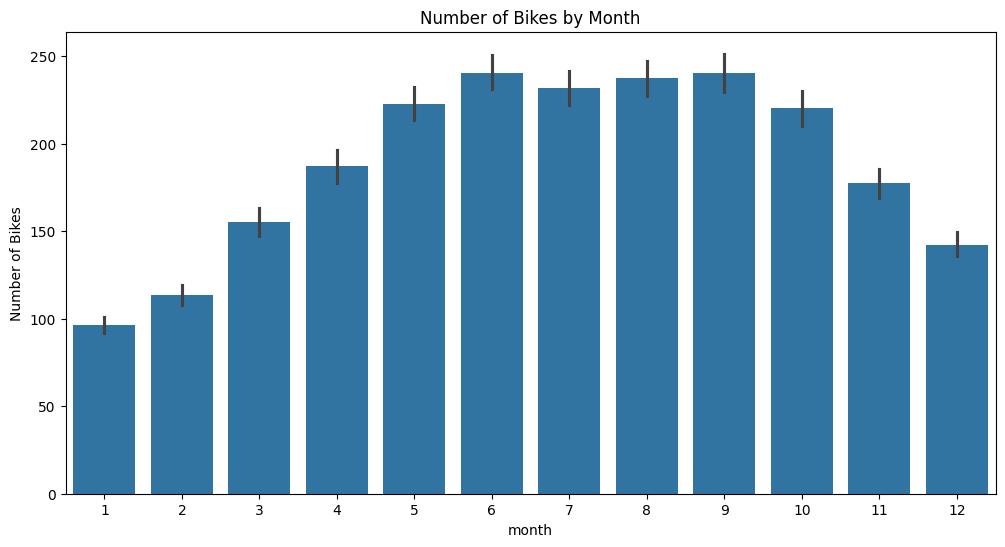

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
# Set the title for the plot ax.set_xlabel('Month')  # Set the x-axis label ax.set_ylabel('Number of Bikes')  # Set the y-axis label
sns.barplot(data, x='month', y='users', ax=ax)
ax.set_xlabel('month')  # Set the x-axis label
ax.set_ylabel('Number of Bikes')  # Set the y-axis label
ax.set_title('Number of Bikes by Month')
plt.show()

Podemos observar que los picos de más uso de las biciletas compartidas son los meses de junio a septiembre. La tendencia en el alquiler de las bicicletas por parte de los usuarios se relaciona con los meses más caluros del año. A partir del mes de octubre empieza a decaer el uso de este servicio de movilidad.

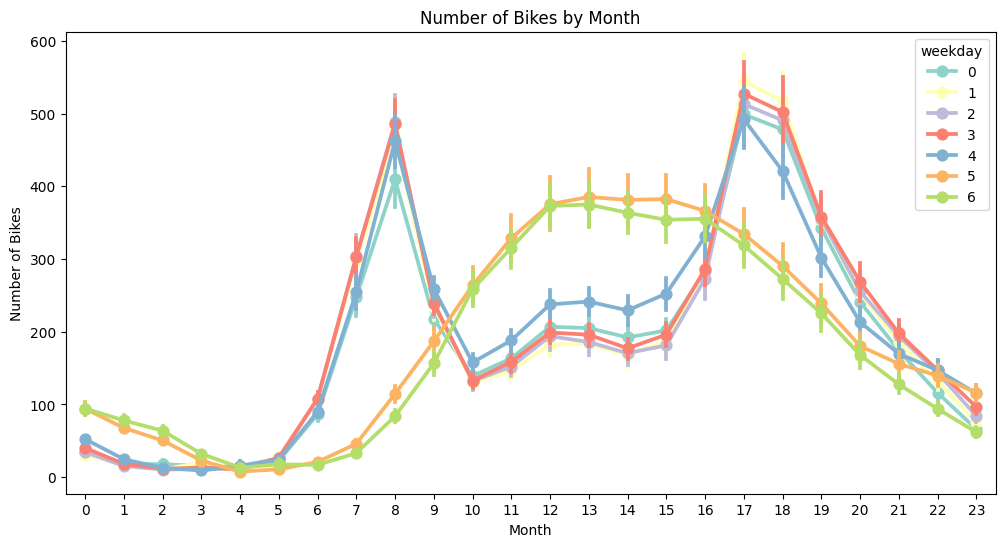

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.pointplot(data=data, x='hour', y='users', hue='weekday', ax=ax, palette="Set3")
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bikes')
ax.set_title('Number of Bikes by Month')
plt.show()

